In [60]:
import pandas as pd

In [61]:
tr = pd.read_parquet(r"../data/processed_data/transaction.parquet")

In [62]:
pd.set_option("display.max_rows",500)
pd.set_option("display.max_columns",500)


## Data review

In [63]:
def data_review(df):
    '''
    funcion que recibe un dataframe y devuelve un dataframe con informacion acerca de el dataframe ingresado
    '''

    mi_dict = {"Column": [], "dType": [], "No_Null_%": [], "No_Null_Qty": [], "Null_%": [], "Null_Qty": []}
    duplicated_rows = df[df.duplicated()]
    count_duplicated_rows = len(duplicated_rows)


    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["Column"].append(columna)
        mi_dict["dType"].append(df[columna].apply(type).unique())
        mi_dict["No_Null_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["No_Null_Qty"].append(df[columna].count())
        mi_dict["Null_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict['Null_Qty'].append(df[columna].isnull().sum())

    df_info = pd.DataFrame(mi_dict)
    
    print("\nTotal rows: ", len(df))
    print("\nTotal full null rows: ", df.isna().all(axis=1).sum())
    print("\nTotal duplicated rows:", count_duplicated_rows)
    
    return df_info

In [64]:
dr = data_review(tr)


Total rows:  590540

Total full null rows:  0

Total duplicated rows: 0


In [65]:
dr

,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,TransactionID,[<class 'int'>],100.00,590540,0.00,0
1,isFraud,[<class 'int'>],100.00,590540,0.00,0
2,TransactionDT,[<class 'int'>],100.00,590540,0.00,0
3,TransactionAmt,[<class 'float'>],100.00,590540,0.00,0
4,ProductCD,[<class 'str'>],100.00,590540,0.00,0
5,card1,[<class 'int'>],100.00,590540,0.00,0
6,card2,[<class 'float'>],98.49,581607,1.51,8933
7,card3,[<class 'float'>],99.73,588975,0.27,1565
8,card4,"[<class 'str'>, <class 'NoneType'>]",99.73,588963,0.27,1577
9,card5,[<class 'float'>],99.28,586281,0.72,4259


### borrar columnas con mas de 80% valores nulos

In [66]:
columns_to_drop = dr[dr['Null_%'] > 80]['Column'].tolist()

In [67]:
columns_to_drop

['dist2',
 'D6',
 'D7',
 'D8',
 'D9',
 'D12',
 'D13',
 'D14',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V322',
 'V323',
 'V324',
 'V325',
 'V326',
 'V327',
 'V328',
 'V329',
 'V330',
 'V331',
 'V332',
 'V333',
 'V334',
 'V335',
 'V336',
 'V337',
 'V338',
 'V339']

In [68]:
tr.shape

(590540, 394)

In [69]:
df_cleaned = tr.drop(columns=columns_to_drop)

In [70]:
df_cleaned.shape

(590540, 339)

In [71]:
#actualizando dr
dr = data_review(df_cleaned)


Total rows:  590540

Total full null rows:  0

Total duplicated rows: 0


## borrando columnas de texto

In [72]:
text_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

In [73]:
text_columns

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [74]:
df_cleaned[text_columns] = df_cleaned[text_columns].fillna('')

In [75]:
df_corr = df_cleaned.drop(columns=text_columns)

In [76]:
# actualizando dr
dr = data_review(df_corr)


Total rows:  590540

Total full null rows:  0

Total duplicated rows: 0


<hr>

In [77]:
dr

,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,TransactionID,[<class 'int'>],100.00,590540,0.00,0
1,isFraud,[<class 'int'>],100.00,590540,0.00,0
2,TransactionDT,[<class 'int'>],100.00,590540,0.00,0
3,TransactionAmt,[<class 'float'>],100.00,590540,0.00,0
4,card1,[<class 'int'>],100.00,590540,0.00,0
5,card2,[<class 'float'>],98.49,581607,1.51,8933
6,card3,[<class 'float'>],99.73,588975,0.27,1565
7,card5,[<class 'float'>],99.28,586281,0.72,4259
8,addr1,[<class 'float'>],88.87,524834,11.13,65706
9,addr2,[<class 'float'>],88.87,524834,11.13,65706


<hr>

## correlacion

In [78]:
# separamos la columna isFraud para juntarla con cada conjunto de columnas
Y = df_corr["isFraud"]
del df_corr["isFraud"]

In [79]:
dr

,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,TransactionID,[<class 'int'>],100.00,590540,0.00,0
1,isFraud,[<class 'int'>],100.00,590540,0.00,0
2,TransactionDT,[<class 'int'>],100.00,590540,0.00,0
3,TransactionAmt,[<class 'float'>],100.00,590540,0.00,0
4,card1,[<class 'int'>],100.00,590540,0.00,0
5,card2,[<class 'float'>],98.49,581607,1.51,8933
6,card3,[<class 'float'>],99.73,588975,0.27,1565
7,card5,[<class 'float'>],99.28,586281,0.72,4259
8,addr1,[<class 'float'>],88.87,524834,11.13,65706
9,addr2,[<class 'float'>],88.87,524834,11.13,65706


In [80]:
dr.shape

(325, 6)

In [81]:
def split_dataframe(df,num_columns):
    dataframes = []

    for  i in range(0,df.shape[1],num_columns):
        df_part = df.iloc[:,i:i+num_columns]
        dataframes.append(df_part)
    return dataframes 

In [82]:
dframes = split_dataframe(df_corr,9)

In [83]:
len(dframes)

36

In [84]:
df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36 = dframes

In [145]:
#columns_to_drop = dr[dr['Null_%'] != 0]['Column'].tolist() #0%
#columns_to_drop = dr[dr['Null_%'] > 10]['Column'].tolist() #0%-10%
#columns_to_drop = dr[(dr['Null_%'] < 10) & (dr['Null_%'] <= 20)]['Column'].tolist() #10%-20%
#columns_to_drop = dr[(dr['Null_%'] < 20) & (dr['Null_%'] < 30)]['Column'].tolist() #20%-30%
#columns_to_drop = dr[(dr['Null_%'] < 30) & (dr['Null_%'] < 40)]['Column'].tolist() #30%-40%
#columns_to_drop = dr[(dr['Null_%'] < 40) & (dr['Null_%'] < 50)]['Column'].tolist() #50%-60%
#columns_to_drop = dr[(dr['Null_%'] < 50) & (dr['Null_%'] < 60)]['Column'].tolist() #60%-70%
#columns_to_drop = dr[(dr['Null_%'] < 60) & (dr['Null_%'] < 70)]['Column'].tolist() #70%-80%
#columns_to_drop = dr[(dr['Null_%'] < 70) & (dr['Null_%'] < 80)]['Column'].tolist() #80%-90%
#columns_to_drop = dr[(dr['Null_%'] < 80) & (dr['Null_%'] < 90)]['Column'].tolist() #90%-100%
#columns_to_drop = dr[(dr['Null_%'] < 90)['Column'].tolist() #90%-100%

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1/36

In [91]:
df1["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

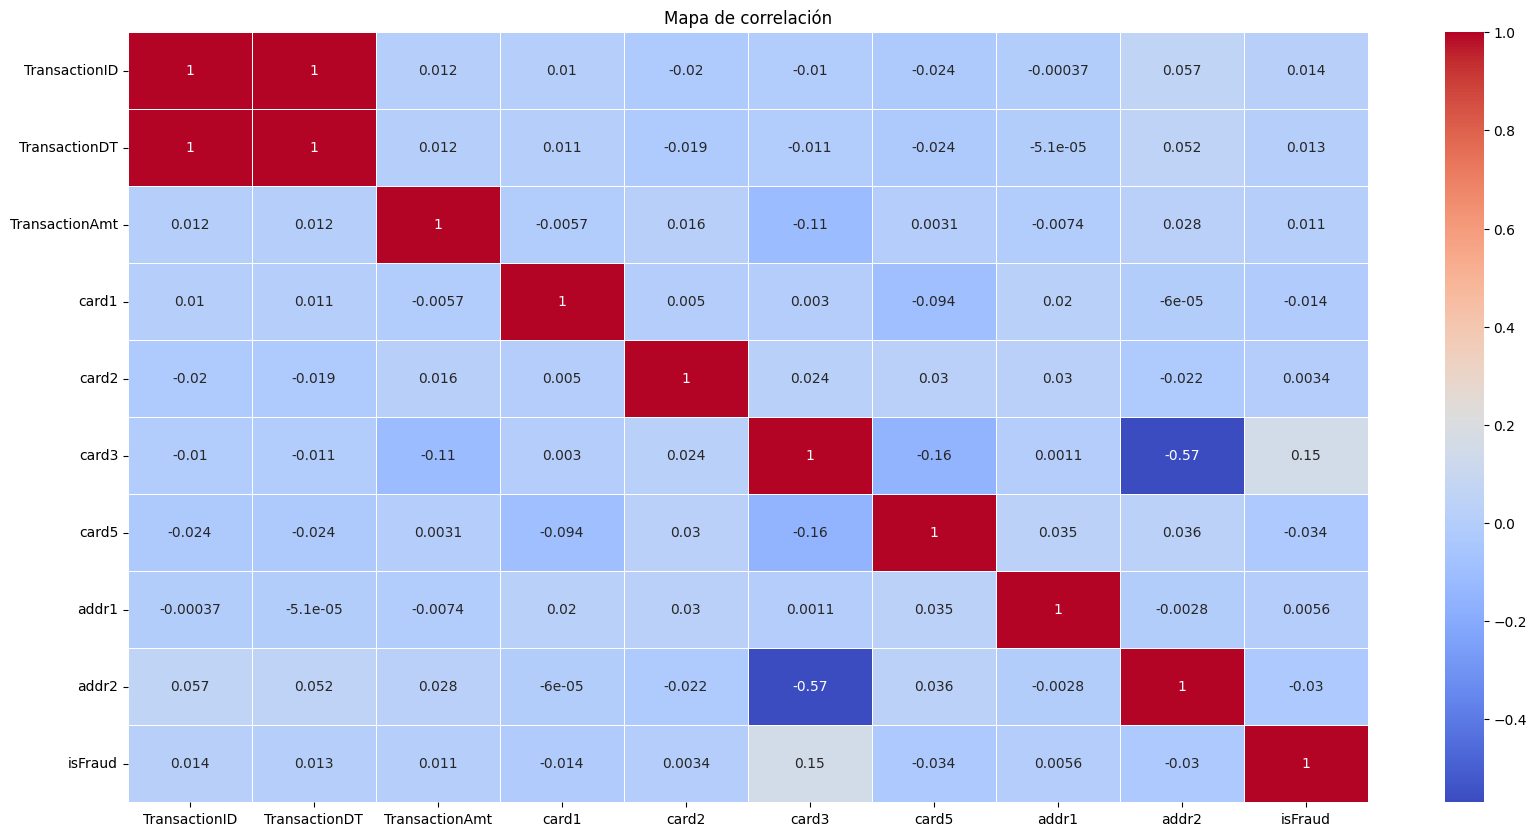

In [96]:
plt.figure(figsize=(20, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [97]:
#del df1

    V302  0.13
    V303  0.12
    V304  0.13

## 2/36

In [98]:
df2["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

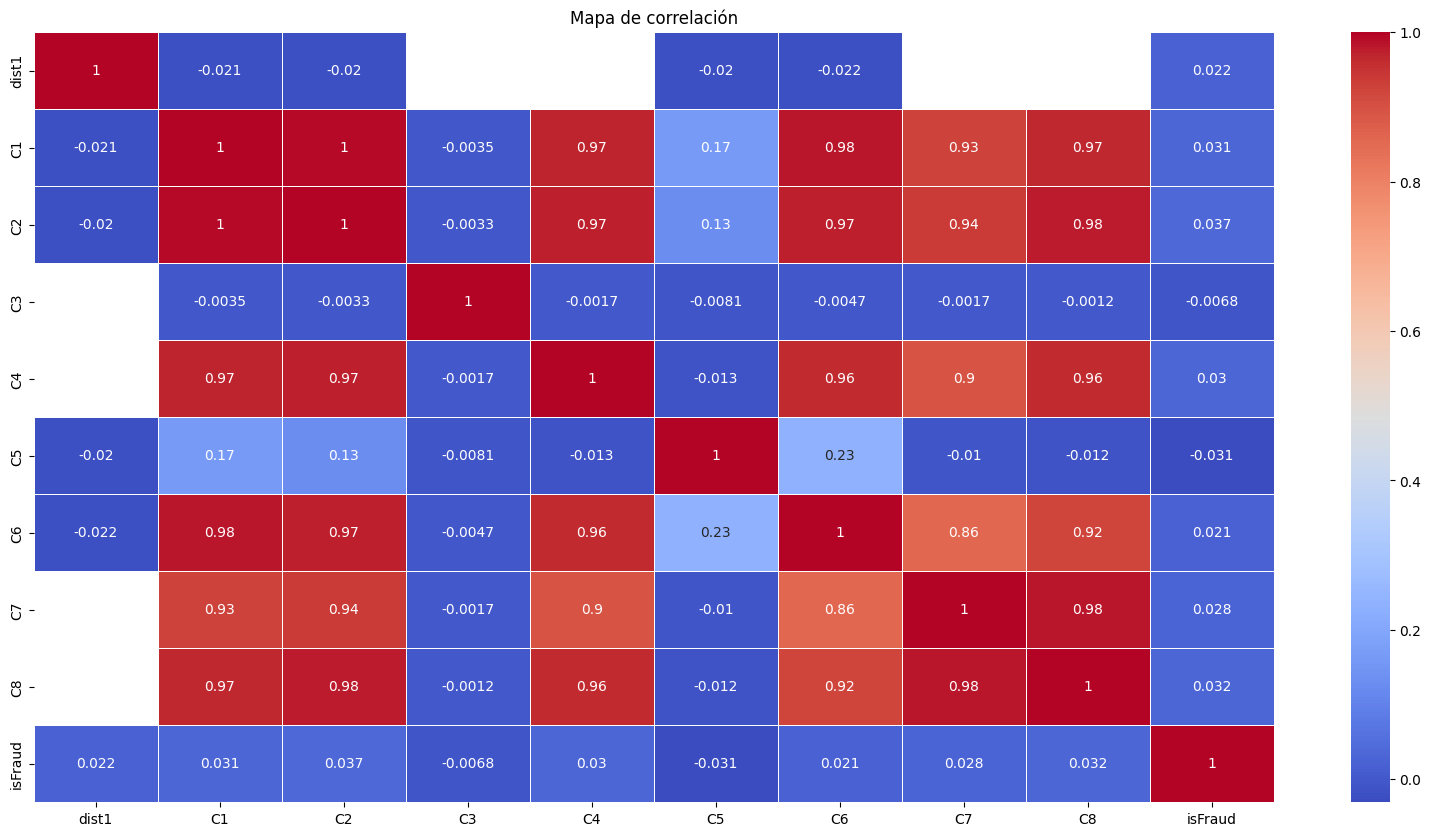

In [100]:
plt.figure(figsize=(20, 10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [101]:
#del df2

##  3/36

In [102]:
df3["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

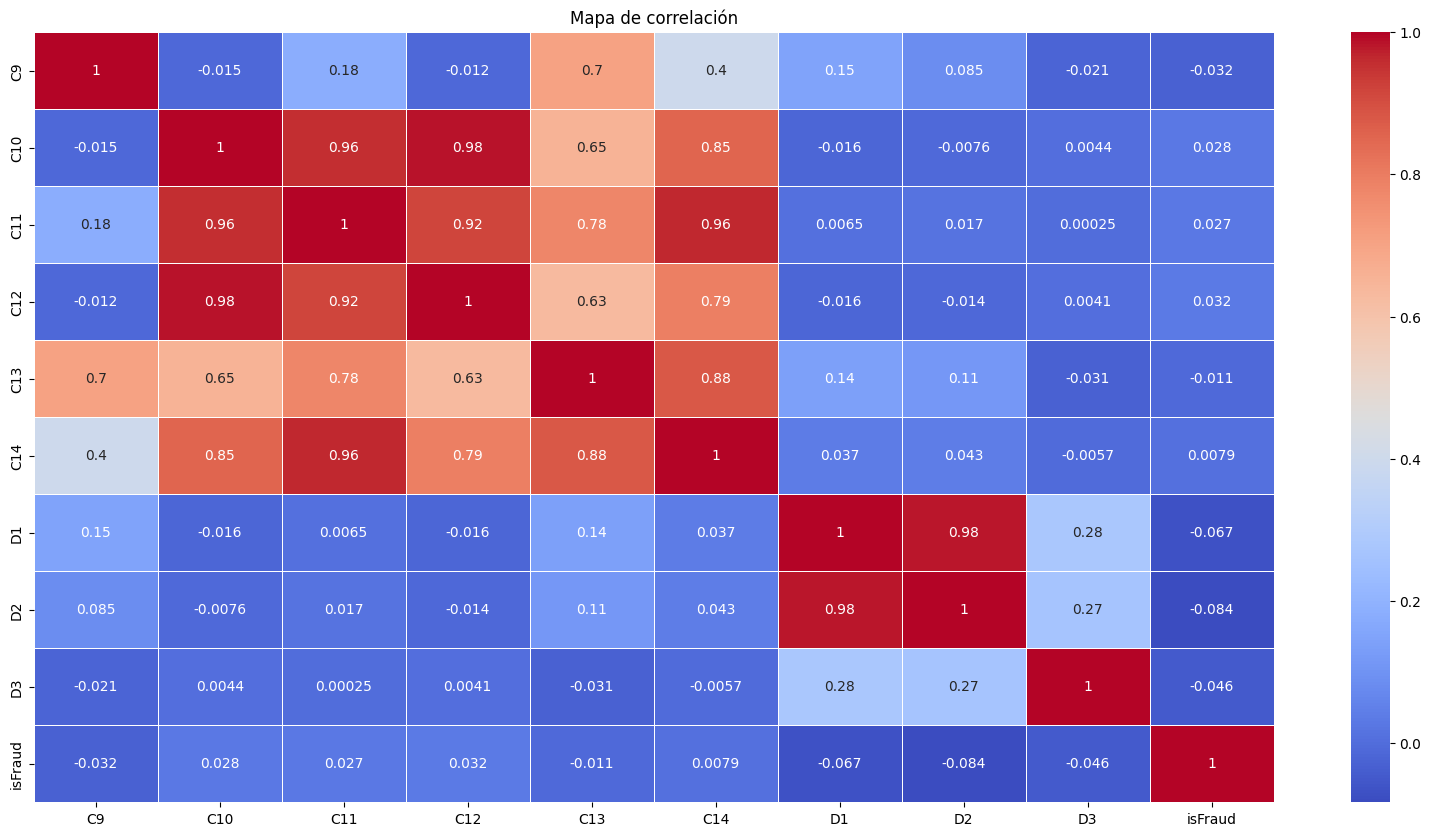

In [103]:
plt.figure(figsize=(20, 10))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [104]:
#del df3

## 4/36

In [105]:
df4["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

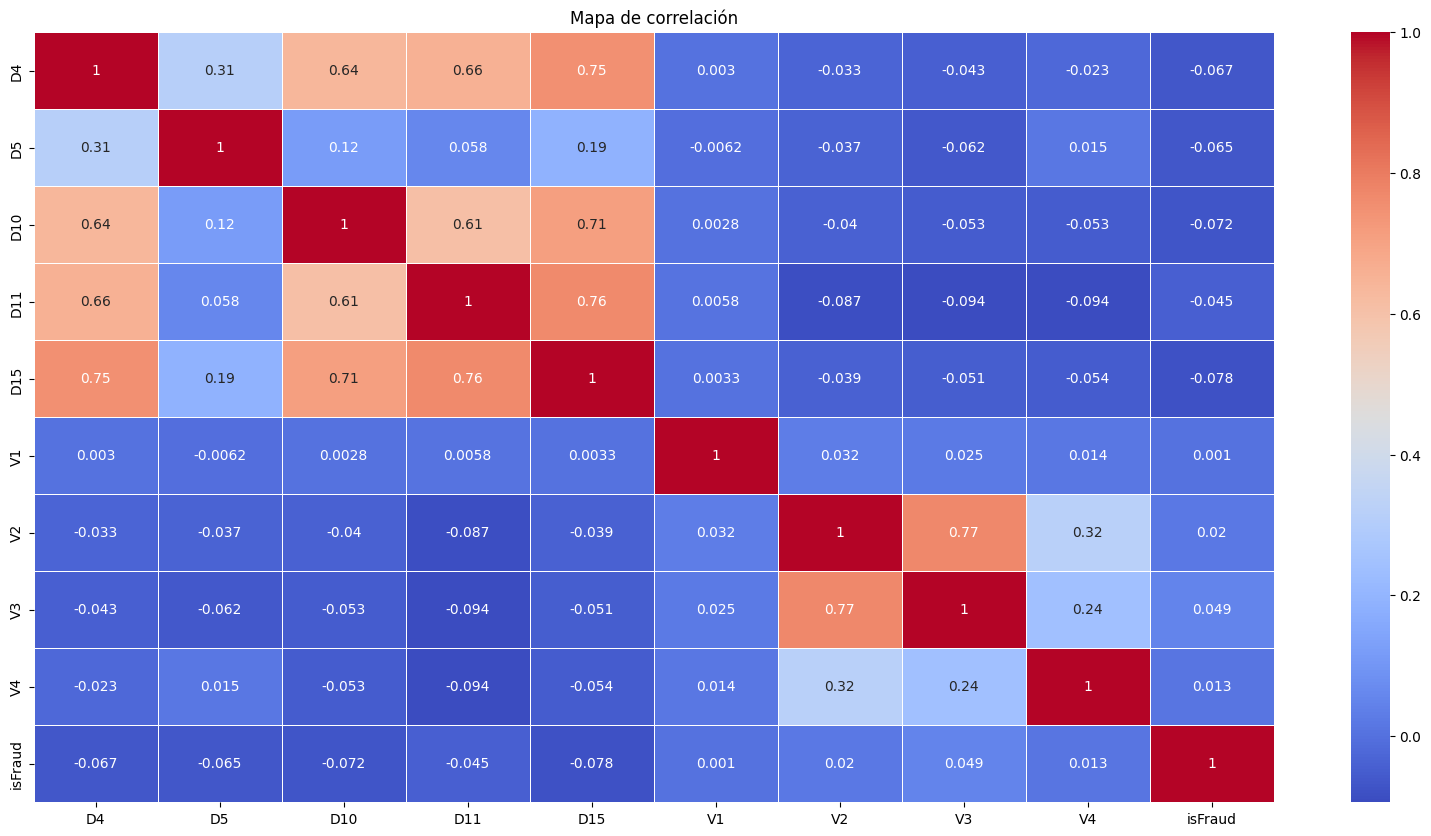

In [106]:
plt.figure(figsize=(20, 10))
sns.heatmap(df4.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [107]:
#del df4

## 5/36

In [108]:
df5["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

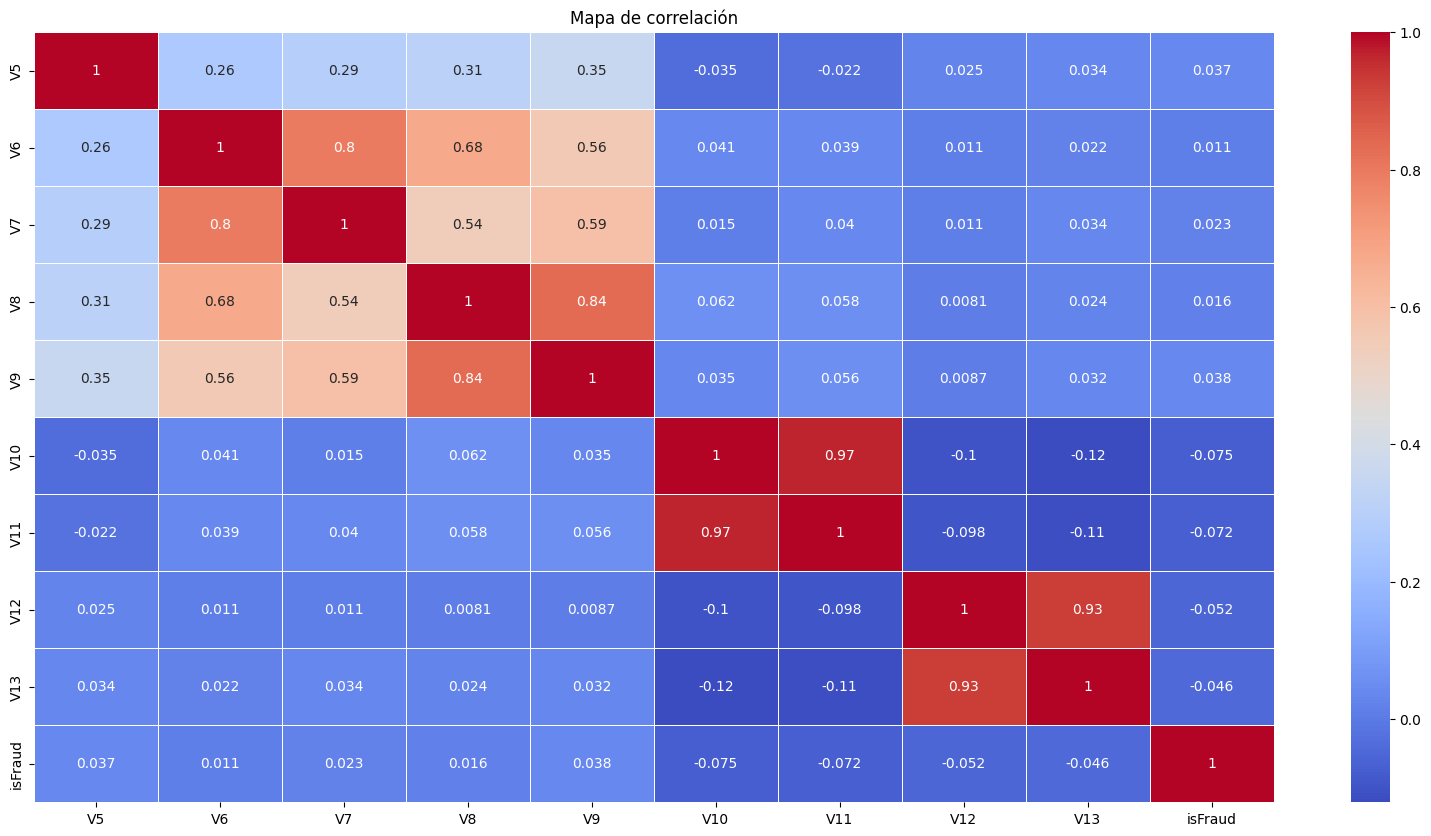

In [109]:
plt.figure(figsize=(20, 10))
sns.heatmap(df5.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [110]:
del df5

## 6/36

In [111]:
df6["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

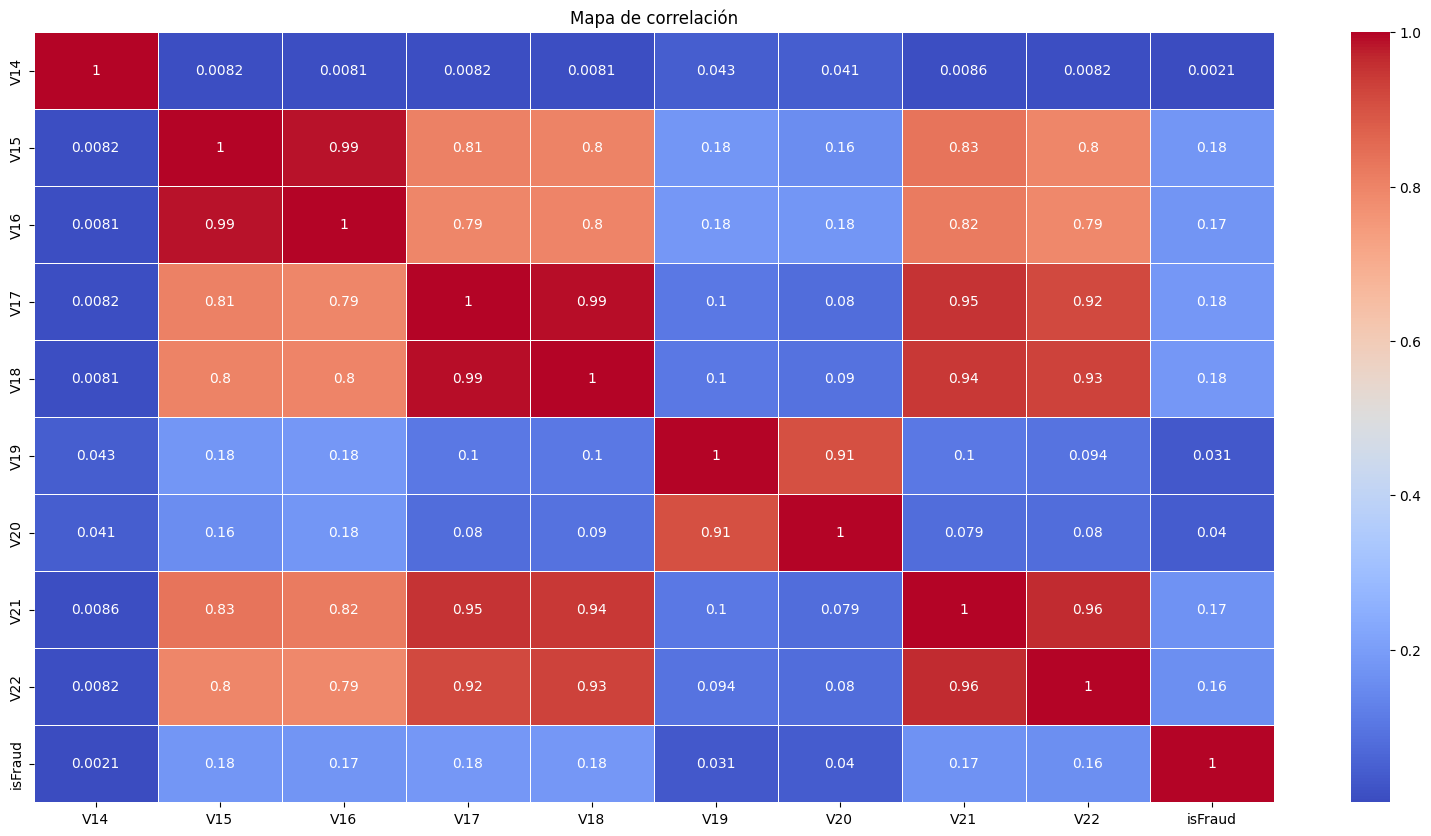

In [112]:
plt.figure(figsize=(20, 10))
sns.heatmap(df6.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

## 7/36

In [ ]:
df7["isFraud"] = Y

Text(0.5, 1.0, 'Mapa de correlación')

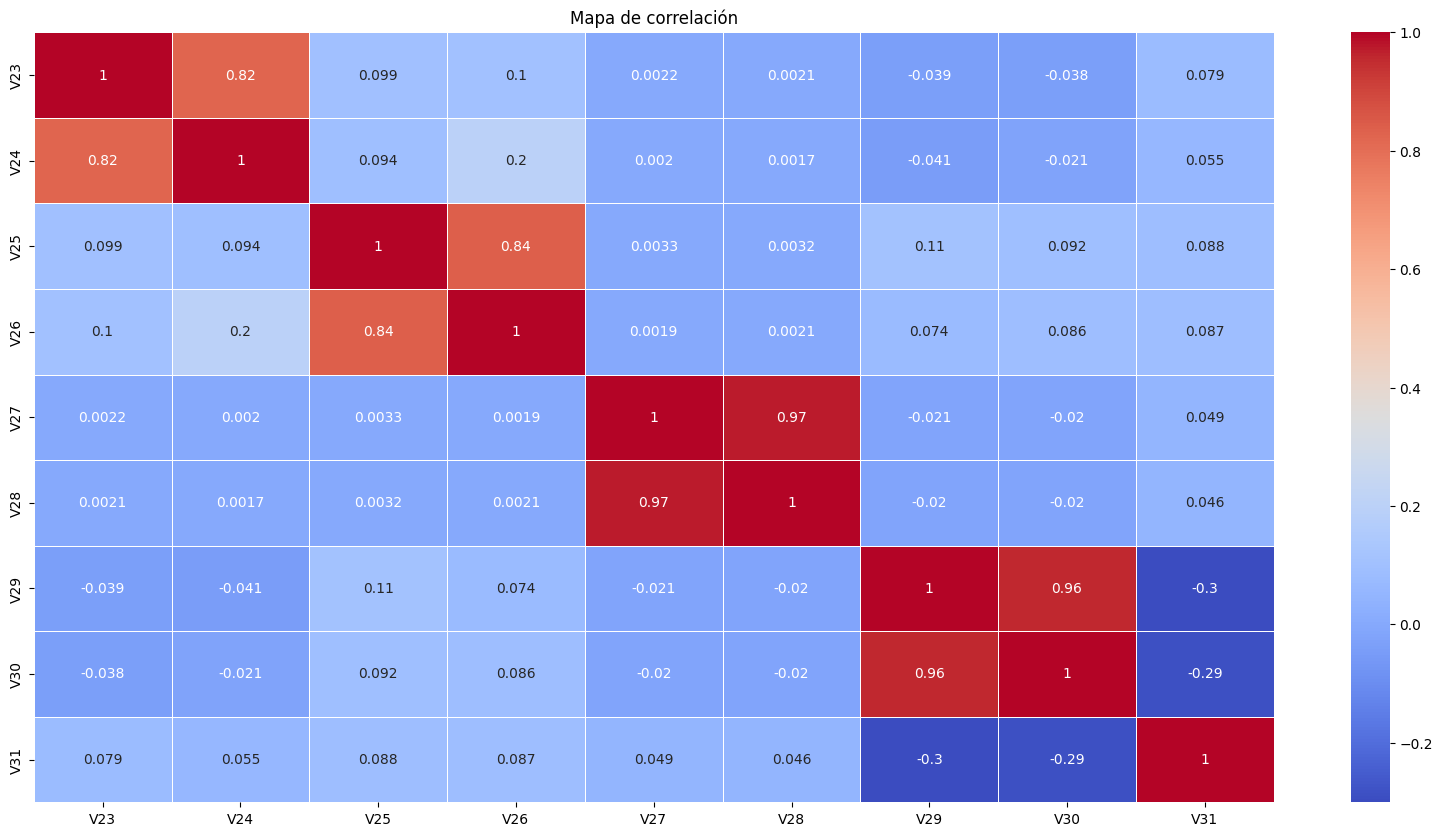

In [113]:
plt.figure(figsize=(20, 10))
sns.heatmap(df7.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [114]:
del df7

## 8/36

In [ ]:
df8["isFraud"] = Y

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df8.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [ ]:
del df8

## 9/36

In [ ]:
df9["isFraud"] = Y

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df9.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [ ]:
del df9

## 10/36

In [ ]:
df10["isFraud"] = Y

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df10.corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Mapa de correlación')

In [ ]:
del df10

## 11/36

In [ ]:
df11["isFraud"] = Y

## 12/36

In [ ]:
df12["isFraud"] = Y

## 13/36

In [ ]:
df13["isFraud"] = Y

## 14/36

In [ ]:
df14["isFraud"] = Y

## 15/36

In [ ]:
df15["isFraud"] = Y

## 16/36

In [ ]:
df16["isFraud"] = Y

## 17/36

In [ ]:
df17["isFraud"] = Y

## 18/36

In [ ]:
df18["isFraud"] = Y

## 19/36

In [ ]:
df19["isFraud"] = Y

## 20/36

In [ ]:
df20["isFraud"] = Y

## 21/36

In [ ]:
df21["isFraud"] = Y

## 22/36

In [ ]:
df22["isFraud"] = Y

## 23/36

In [ ]:
df23["isFraud"] = Y

## 24/36

In [ ]:
df24["isFraud"] = Y

## 25/36

In [ ]:
df25["isFraud"] = Y

## 26/36

In [ ]:
df26["isFraud"] = Y

## 27/36

In [ ]:
df27["isFraud"] = Y

## 28/36

In [ ]:
df28["isFraud"] = Y

## 29/36

In [ ]:
df29["isFraud"] = Y

## 30/36

In [ ]:
df30["isFraud"] = Y

## 31/36

In [ ]:
df31["isFraud"] = Y

## 32/36

In [ ]:
df32["isFraud"] = Y

## 33/36

In [ ]:
df33["isFraud"] = Y

## 34/36

In [ ]:
df34["isFraud"] = Y

## 35/36

In [ ]:
df35["isFraud"] = Y

## 36/36

In [ ]:
df36["isFraud"] = Y

<hr>

In [115]:
df_cleaned

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,,,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,13.0,13.0,0.0,T,T,T,M2,F,T,,,,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,gmail.com,,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,,,,M0,T,T,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [116]:
dr = data_review(df_cleaned)


Total rows:  590540

Total full null rows:  0

Total duplicated rows: 0


In [117]:
dr

,Column,dType,No_Null_%,No_Null_Qty,Null_%,Null_Qty
0,TransactionID,[<class 'int'>],100.00,590540,0.00,0
1,isFraud,[<class 'int'>],100.00,590540,0.00,0
2,TransactionDT,[<class 'int'>],100.00,590540,0.00,0
3,TransactionAmt,[<class 'float'>],100.00,590540,0.00,0
4,ProductCD,[<class 'str'>],100.00,590540,0.00,0
5,card1,[<class 'int'>],100.00,590540,0.00,0
6,card2,[<class 'float'>],98.49,581607,1.51,8933
7,card3,[<class 'float'>],99.73,588975,0.27,1565
8,card4,[<class 'str'>],100.00,590540,0.00,0
9,card5,[<class 'float'>],99.28,586281,0.72,4259


In [118]:
columns_to_drop = dr[dr['Null_%'] != 0]['Column'].tolist()

In [119]:
columns_to_drop

['card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D10',
 'D11',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',

In [120]:
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [124]:
text_columns = df_cleaned.select_dtypes(include=['object']).columns.tolist()

In [125]:
text_columns

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9']

In [126]:
df_cleaned[text_columns] = df_cleaned[text_columns].fillna('')

In [127]:
df_cleaned = df_cleaned.drop(columns=text_columns)

In [128]:
df_cleaned

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V279,V280,V284,V285,V286,V287,V290,V291,V292,V293,V294,V295,V297,V298,V299,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,13926,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,2755,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,4663,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,18132,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,1.0,28.0,0.0,10.0,0.0,4.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,4497,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,6550,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,10444,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,12037,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,7826,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,1.0,2.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,117.000000,2903.500000,117.000000,117.0,669.500000,0.0,117.0,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [129]:
del df_cleaned["TransactionID"]

In [130]:
df_cleaned

,isFraud,TransactionDT,TransactionAmt,card1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V279,V280,V284,V285,V286,V287,V290,V291,V292,V293,V294,V295,V297,V298,V299,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V316,V317,V318,V319,V320,V321
0,0,86400,68.50,13926,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,0,86401,29.00,2755,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0,86469,59.00,4663,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0,86499,50.00,18132,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,1.0,28.0,0.0,10.0,0.0,4.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,0,86506,50.00,4497,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,15811047,49.00,6550,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,0,15811049,39.50,10444,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,0,15811079,30.95,12037,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,0,15811088,117.00,7826,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,5.0,0.0,1.0,1.0,2.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,117.000000,2903.500000,117.000000,117.0,669.500000,0.0,117.0,0.0,2234.0,0.0,0.000000,0.000000,0.000000


In [131]:
df_cleaned.to_parquet(r"../data/processed_data/transaction_ml.parquet")